<H1> Linear Regression

A simple linear model is of the form

$$y = \alpha + \beta x + \epsilon$$

We will use a sample data set from R to illustrate a simple linear regression.

In [17]:
# Let's see what it looks like:
ToothGrowth

,len,supp,dose
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5
6,10,VC,0.5
7,11.2,VC,0.5
8,11.2,VC,0.5
9,5.2,VC,0.5
10,7,VC,0.5


These data are from and experiment where 60 Guinea Pigs were divided in to 6 groups and who were given a specific dose of either vitamin C or orange juice over a period of time, and then their tooth length was measured. We'll do two separated fits: one for vitamin C and one for OJ.

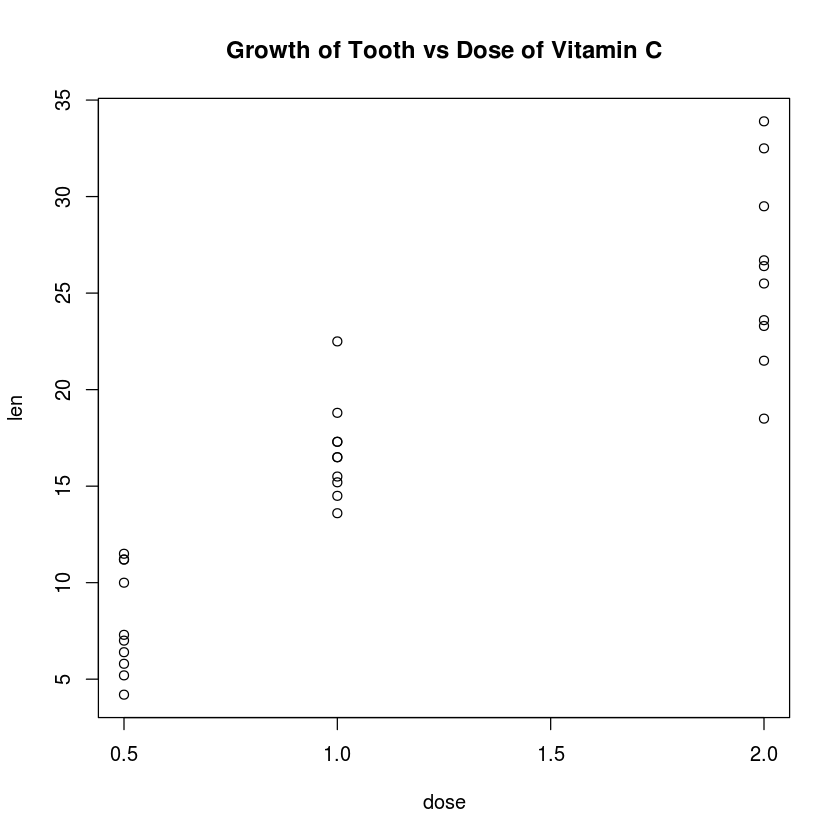

In [57]:
# Let's see a scatter plot
with(subset(ToothGrowth,  supp == "VC"), plot(dose, len))
title(main="Growth of Tooth vs Dose of Vitamin C")

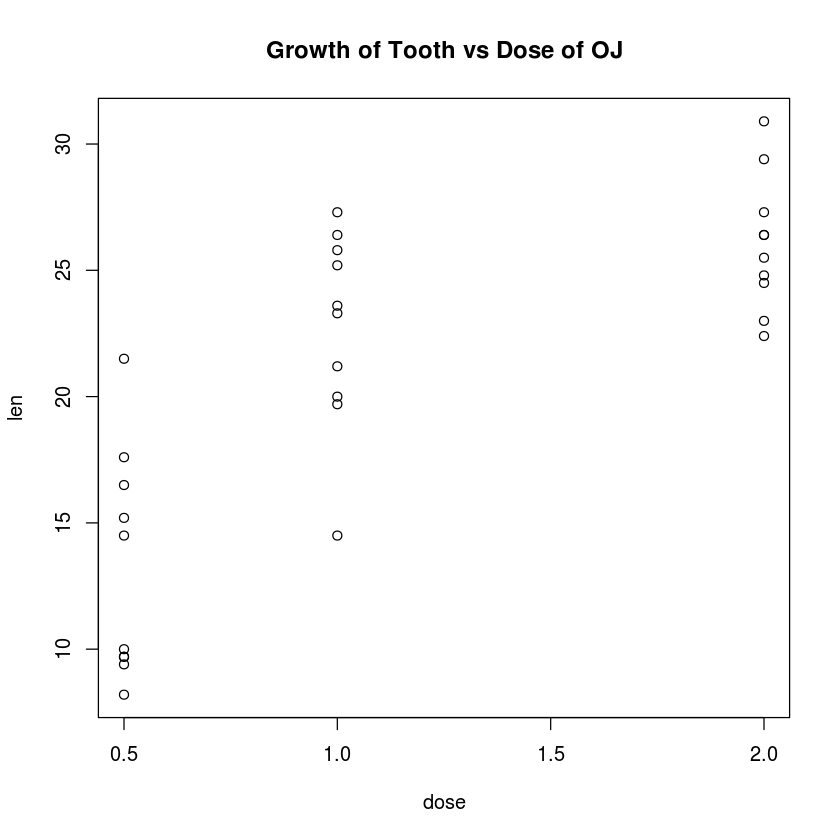

In [7]:
with(subset(ToothGrowth,  supp == "OJ"), plot(dose, len))
title(main="Growth of Tooth vs Dose of OJ")

In [58]:
# Fit for vitamin C
fit.tooth.VC<-lm(ToothGrowth$len ~ ToothGrowth$dose,subset=(ToothGrowth$supp=="VC"))
summary(fit.tooth.VC)


Call:
lm(formula = ToothGrowth$len ~ ToothGrowth$dose, subset = (ToothGrowth$supp == 
    "VC"))

Residuals:
    Min      1Q  Median      3Q     Max 
-8.2264 -2.6029  0.0814  2.2288  7.4893 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)         3.295      1.427   2.309   0.0285 *  
ToothGrowth$dose   11.716      1.079  10.860 1.51e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.685 on 28 degrees of freedom
Multiple R-squared:  0.8082,	Adjusted R-squared:  0.8013 
F-statistic: 117.9 on 1 and 28 DF,  p-value: 1.509e-11


In [59]:
# Fit for OJ
fit.tooth.OJ<-lm(ToothGrowth$len ~ ToothGrowth$dose,subset=(ToothGrowth$supp=="OJ"))
summary(fit.tooth.OJ)


Call:
lm(formula = ToothGrowth$len ~ ToothGrowth$dose, subset = (ToothGrowth$supp == 
    "OJ"))

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2557 -3.7979 -0.0643  3.3521  7.9386 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        11.550      1.722   6.708 2.79e-07 ***
ToothGrowth$dose    7.811      1.302   6.001 1.82e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.446 on 28 degrees of freedom
Multiple R-squared:  0.5626,	Adjusted R-squared:  0.547 
F-statistic: 36.01 on 1 and 28 DF,  p-value: 1.825e-06


Note that the `lm` function (for linear model) takes arguments in a specific format:

$$ y\_values \sim  x\_values$$

Or more formally stated: Dependent Variable ~ Independent Variable

<H2>R Formula Syntax

A more complicated linear model might include more than one main effect and/or interaction terms such as:

$$ y = \alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 +\epsilon$$

Below is a table of R formula syntax and the corresponding model. There are others, but that is a topic for more advanced study.


|       Syntax       | Model |
| ------------------ | ----- |
| $x_1 + x_2 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ | $y = \alpha + \beta_1 x_1 + \beta_2 x_2  +\epsilon$ |
| $x_1:x_1$ | $y = \alpha + \beta x_1 x_2 +\epsilon \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ |
| $x_1 * x_2$ | $y = \alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 +\epsilon \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ |
| $x_1 * x_2 *x_3$ | $y = \alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +\beta_4 x_1 x_2 +\beta_5 x_1 x_3 + \beta_6 x_2 x_3 + \beta_7 x_1 x_2 x_3 +\epsilon$ |
| $(x_1 + x_2 + x_3)^2$ | $y = \alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 +\beta_4 x_1 x_2 +\beta_5 x_1 x_3 + \beta_6 x_2 x_3 +\epsilon$ |


<H2>Work!

Load the R data set called "mtcars". 

* Perform a linear regression on mpg using cyl and hp as main effects. 
* Add wt (weight) as a third main effect.
* Add interaction terms for hp and weight
